In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

from typing import List, Tuple, Dict

In [2]:
def plot_metrics(*,
                 base_path: str,
                 simulation_ids: List[int],
                 plot_grid_dimensions: Tuple[int, int],
                 slope: float,
                 r_stat_multiplier: float,
                 min_rim_percentage: float,
                 effective_radius_multiplier: float,
                 metric: str,
                 metric_label: str,
                 figsize: Tuple[float, float],
                 saturation_points: Dict[int, int] = None) -> Dict[int, pd.DataFrame]:
    """
    Plots metrics for the supplied simulation ids.
    Returns a dictionary of the simulations' ids to their dataframes.
    """
    result: Dict[int, pd.DataFrame] = dict()
    
    fig, axes = plt.subplots(nrows=plot_grid_dimensions[0], ncols=plot_grid_dimensions[1], figsize=figsize)
    
    plot_counter = 0
    
    for simulation_id in simulation_ids:
        filename = f'{base_path}/{slope:.2f}_{r_stat_multiplier:.2f}_{min_rim_percentage:.2f}_{effective_radius_multiplier:.2f}/{simulation_id}/statistics.csv'
        data = pd.read_csv(filename)
        data = data.rename(columns={
            'n_craters_added_in_observed_area': 'n_craters_added_in_study_region',
            'n_craters_in_observed_area': 'n_craters_in_study_region'})

        ax_row = plot_counter // plot_grid_dimensions[1]
        ax_col = plot_counter % plot_grid_dimensions[1]
        ax = axes[ax_row][ax_col]
        
        ax.plot(data.n_craters_added_in_study_region, data[metric])
        ax.set_xlabel('Craters Generated')
        ax.set_ylabel(metric_label)
        
        if saturation_points and simulation_id in saturation_points:
            ax.axvline(x=saturation_points[simulation_id], ls="--")
        
        
        result[simulation_id] = data
        
        plot_counter += 1
        
    return result

Given values for levels of our four variables:
(Za, Z, Ad, max_n_craters) = f(slope, rstat, min_rim, eff_rad, n_craters_obs, Z_obs, Za_obs, ad_obs)
- Where f is at saturation
- And there is a range on each of the input parameters

- Investigate distributions of responses

Try modeling f using:
- Linear, quadratic, other (RF, GBM)



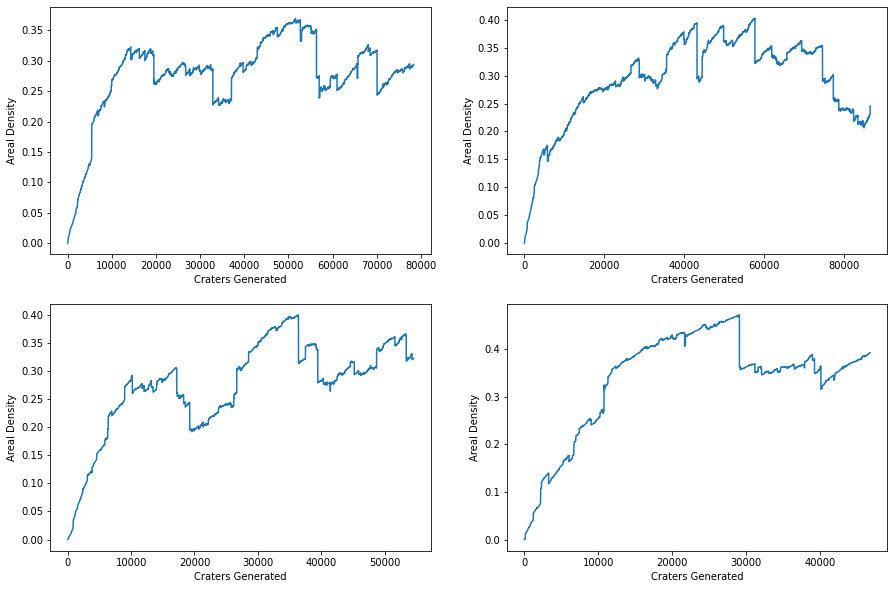

In [3]:
data = plot_metrics(base_path='/home/mason/full_runs/python/sfd_comparison/',
                    simulation_ids=list(range(1, 5)),
                    plot_grid_dimensions=(2, 2),
                    slope=2.00,
                    r_stat_multiplier=5.00,
                    min_rim_percentage=0.60,
                    effective_radius_multiplier=1.90,
                    metric="areal_density",
                    metric_label="Areal Density",
                    figsize=(15, 10))

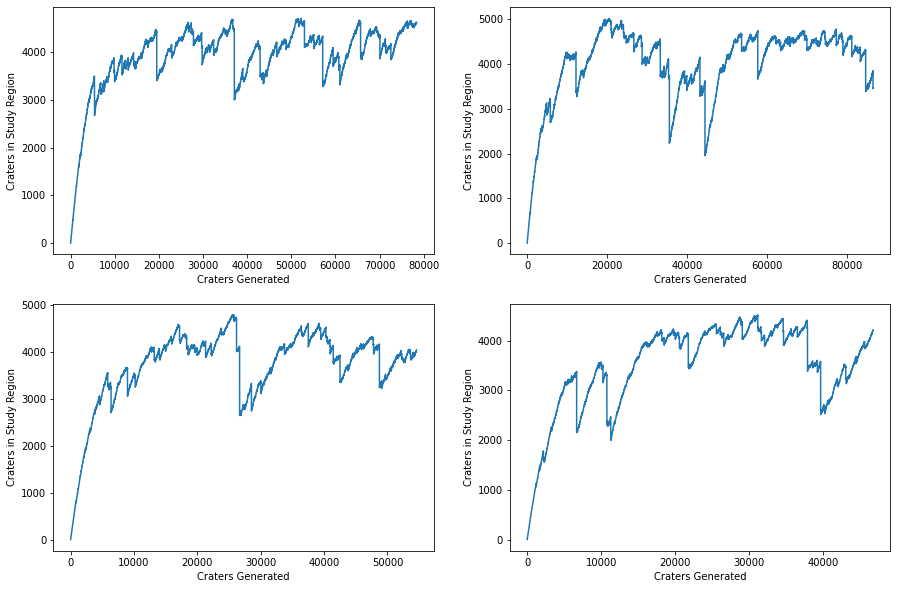

In [70]:
data = plot_metrics(base_path='/home/mason/full_runs/python/sfd_comparison/',
                    simulation_ids=list(range(1, 5)),
                    plot_grid_dimensions=(2, 2),
                    slope=2.00,
                    r_stat_multiplier=5.00,
                    min_rim_percentage=0.60,
                    effective_radius_multiplier=1.90,
                    metric="n_craters_in_study_region",
                    metric_label="Craters in Study Region",
                    figsize=(15, 10))

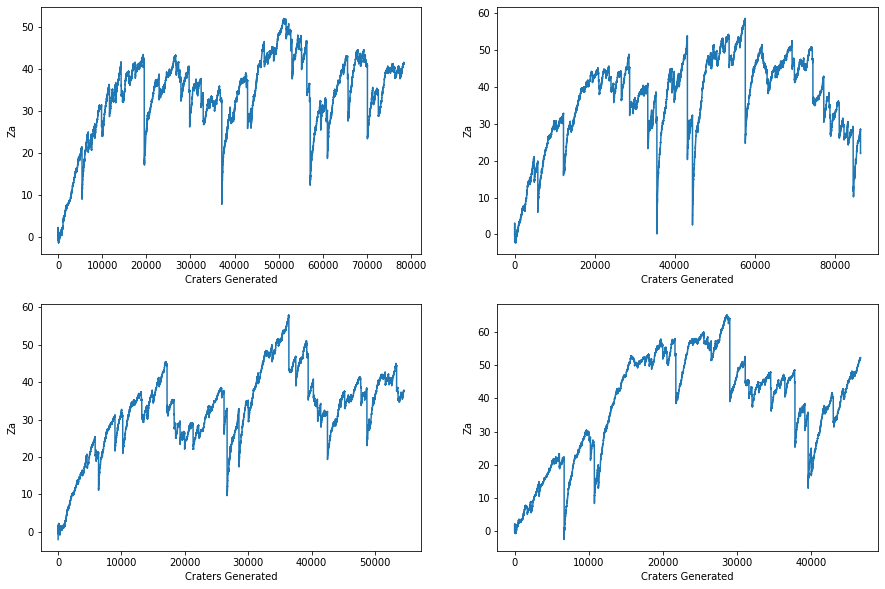

In [69]:
data = plot_metrics(base_path='/home/mason/full_runs/python/sfd_comparison/',
                    simulation_ids=list(range(1, 5)),
                    plot_grid_dimensions=(2, 2),
                    slope=2.00,
                    r_stat_multiplier=5.00,
                    min_rim_percentage=0.60,
                    effective_radius_multiplier=1.90,
                    metric="za",
                    metric_label="Za",
                    figsize=(15, 10))

### Plotting SFDs

Look over revised recommended paper for some comparison code

In [18]:
def plot_sfds(state: pd.DataFrame, times: List[int]):
    # Track min and max radii
    min_radius = 1e10
    max_radius = 0
    
    for time in times:
        state_at_time = state[state.n_craters_added_in_study_region == time]
        radii = state_at_time.radius.sort_values()
        
        min_r = radii.head(1).squeeze()
        max_r = radii.tail(1).squeeze()
        if min_r < min_radius:
            min_radius = min_r
        if max_r > max_radius:
            max_radius = max_r
        
        plt.plot(radii, range(len(radii) + 1, 1, -1), label=time)
        
#     # Plot geometric saturation lines
#     saturation_range = np.array(range(int(min_radius), int(max_radius)))
#     saturation_vals = np.array([10000**2 / (np.pi * x**2) for x in saturation_range])
#     plt.plot(saturation_range, saturation_vals/10, 'b--', label="10% Sat")
#     plt.plot(saturation_range, saturation_vals/100, 'r--', label="1% Sat")
    
#     # Plot production lines
#     production_vals = np.array([x**-2.8 for x in saturation_range])
#     plt.plot(saturation_range, production_vals * 1e6, 'g--', label="Prod 1e6")
#     plt.plot(saturation_range, production_vals * 1e7, 'g--', label="Prod 1e7")
#     plt.plot(saturation_range, production_vals * 1e8, 'g--', label="Prod 1e8")
    
    plt.subplots_adjust(right=0.7)
    plt.tight_layout(rect=[0, 0, 0.75, 1])
    
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.xscale('log')
    plt.yscale('log')

In [14]:
base_path = '/home/mason/full_runs/python/sfd_comparison'
slope = 2.00
r_stat_multiplier = 5.00
min_rim_percentage = 0.60
effective_radius_multiplier = 1.90
n_craters = range(50, 78382, 50)

states = []
for n in n_craters:
    state = pd.read_parquet(f'{base_path}/{slope:.2f}_{r_stat_multiplier:.2f}_{min_rim_percentage:.2f}_{effective_radius_multiplier:.2f}/1/state_{n}.parquet')
    states.append(state)

state = pd.concat(states, axis=0)

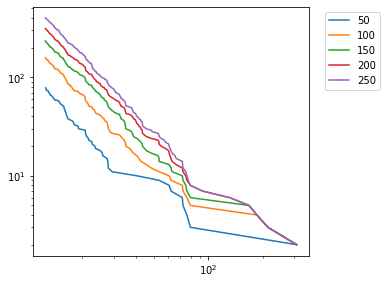

In [65]:
step = 50
plot_sfds(state, list(range(step, 6*step, step)))

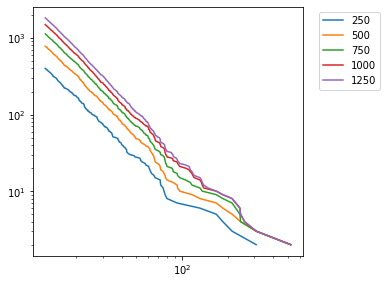

In [66]:
step = 250
plot_sfds(state, list(range(step, 6*step, step)))

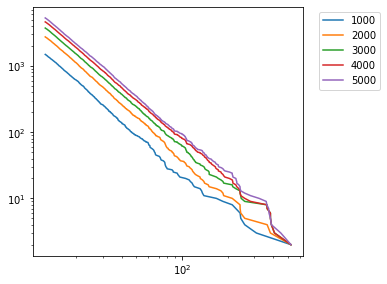

In [67]:
step = 1000
plot_sfds(state, list(range(step, 6*step, step)))

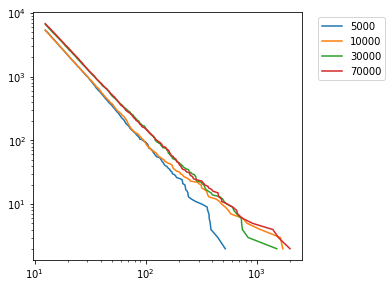

In [26]:
plot_sfds(state, [5000, 10000, 30000, 70000])

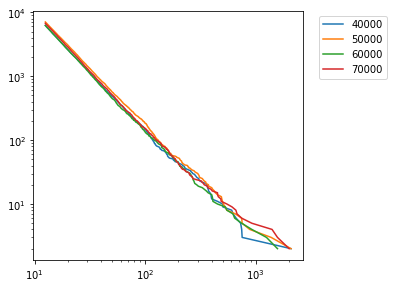

In [41]:
plot_sfds(state, [40000, 50000, 60000, 70000])

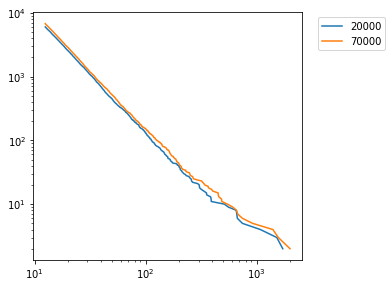

In [57]:
plot_sfds(state, [20000, 70000])

In [56]:
t1 = 20000
t2 = 70000
r1 = state[state.n_craters_added_in_study_region == t1].radius
r1 = r1[r1 > 600]
r2 = state[state.n_craters_added_in_study_region == t2].radius
r2 = r2[r2 > 600]
stats.ks_2samp(r1, r2)

KstestResult(statistic=0.17857142857142858, pvalue=0.9975135975135975)

In [36]:
time_values = [40000, 60000, 70000]
radii = [state[state.n_craters_added_in_study_region == t].radius for t in time_values]
stats.anderson_ksamp(radii)

Anderson_ksampResult(statistic=-0.6314994012651478, critical_values=array([0.44925884, 1.3052767 , 1.9434184 , 2.57696569, 3.41634856,
       4.07210043, 5.56419101]), significance_level=0.25)

In [39]:
time_values = range(50, 500, 50)
radii = [state[state.n_craters_added_in_study_region == t].radius for t in time_values]
stats.anderson_ksamp(radii)

Anderson_ksampResult(statistic=-2.326374590614719, critical_values=array([0.57525442, 1.33126335, 1.8394592 , 2.31735785, 2.92067428,
       3.36567522, 4.34384551]), significance_level=0.25)